In [ ]:
# Find optimal N clasters with elbow optimal k

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
#df_100k = pd.read_csv('best_100k.csv', sep=',', encoding='utf-8')
#df_50k = pd.read_csv('best_50k.csv', sep=',', encoding='utf-8')
df_10k = pd.read_csv('best_10k.csv', sep=',', encoding='utf-8')



In [3]:
sample_df = df_10k
sample_df.shape

(10000, 17)

In [4]:
cols_of_interest = ['Totall_Score',
 'Years_of_Expirience',
 'Coding_skill',
 'System_architect_knowledge',
 'Common_knowledge',
 'Algorithms_data_struct',
 'Soft_Skill',
 'Recommendation',
 'Education',
 'First_impression',
 'Comunication',
 'Willness_to_learn',
 'Certificates',
 'Willness_to_knowledge_sharing',
 'Motivation'
 ]

In [5]:
df1 = sample_df.drop(columns =['Person_Name'])
print(df1.columns)


Index(['Unnamed: 0', 'Totall_Score', 'Years_of_Expirience', 'Coding_skill',
       'System_architect_knowledge', 'Common_knowledge',
       'Algorithms_data_struct', 'Soft_Skill', 'Recommendation', 'Education',
       'First_impression', 'Communication', 'Willness_to_learn',
       'Certificates', 'Willness_to_knowledge_sharing', 'Motivation'],
      dtype='object')


In [6]:
X = StandardScaler().fit_transform(df1)
X

array([[-1.73187761,  5.75277282,  1.53650317, ...,  1.12420759,
         0.9814526 ,  0.99765956],
       [-1.7315312 ,  5.42825976,  1.06691173, ...,  1.12420759,
         0.30758628,  0.99765956],
       [-1.73118479,  5.1037467 , -0.34186256, ...,  1.12420759,
         0.9814526 ,  0.65901069],
       ...,
       [ 1.73118479, -1.06200144, -0.34186256, ...,  0.03559755,
         0.9814526 ,  0.32036183],
       [ 1.7315312 , -1.06200144,  1.06691173, ..., -1.05301249,
        -1.04014636, -0.01828704],
       [ 1.73187761, -1.06200144, -0.34186256, ..., -1.05301249,
         0.30758628, -0.35693591]])

In [7]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=12)
#Run the clustering algorithm
model = k_means.fit(X)
model



KMeans(n_clusters=12)

In [8]:
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)

In [9]:
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.06946488900226701

In [10]:
metrics.calinski_harabasz_score(X, labels)

448.73286652799817

In [11]:
k_means_8 = KMeans(n_clusters=8)
model = k_means_8.fit(X)
y_hat_8 = k_means_8.predict(X)

In [12]:
labels_8 = k_means_8.labels_
metrics.silhouette_score(X, labels_8, metric = 'euclidean')
metrics.calinski_harabasz_score(X, labels_8)

557.1886752320751

In [13]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

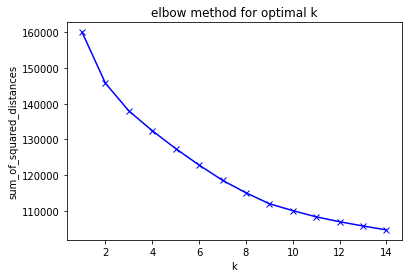

In [14]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()



#### The Result description.
After few runs the optimal k is in range [9, 10, 11] .

It make sens becuase of: 
- The decimal nature of the data. And data closeness to `normal distribution`.

Data normalization does not affect on the number of clusters.
For further analysis, we need to apply additional approaches:

- apply a different method (or a combination of methods for example "random forest").
- Include or exclude additional columns to the dataframe for analysis
- etc.